# Computer Problem Set 9 : Two-factor Gaussian yield curve

## Imane Farhat

In [74]:
import numpy as np
import matplotlib.pyplot as plt

Let $B=(B^1,B^2)$ be a Brownian motion in $\mathbb{R}^2$ under the risk-neutral measure $\mathbb{Q}$, and $x_i, \lambda_i, \sigma_i, \theta_i$ be some positive parameters. We suppose that the instateneous interest rate is defined by :
$$ r_t := X^{(1)}_t + X^{(2)}_t $$
where :
$$ dX^{(i)}_t = \lambda_i (\theta_i - X^{(i)}_t)dt + \sigma_i dB^i_t , X^{(i)}_0 = x_i,   i=1,2 $$

The no-arbitrage price of the T-maturity zero-coupon bond is given by $P_0(T) := \mathbb{E}^\mathbb{Q} [e^{ \int_0^T r_t dt }]$, inducing the yields to maturity $R_0(T) = - \frac{\ln{P_0(T)}}{T} $ :

$ R_0(T) = \rho_1(T) + \rho_2(T)$ for all $T \geq 0$,

with $\rho_i(T) := \theta_i + (x_i - \theta_i) \frac{\Lambda_i(T)}{T} - \frac{\sigma_i^2}{2T} \int_0^T \Lambda_i(t)^2 dt $

and $\Lambda_i(t) := \frac{1-e^{-\lambda_i t}}{\lambda_i} $

### Question 1

For a maturity T and a number of steps n, and $h:= T/n$, $t_j = jh , j=0,...,n$. By Îto's formula, we have 
$$X^{(i)}_{t_j} = \theta_i + (X^{(i)}_{t_{j-1}} - \theta_i) e^{-\lambda_i h} + \sigma \int_{t_{j-1}}^{t_j} e^{-\lambda_i (t_j - s)} dB^i_s , j=1,...,n , i=1,2$$

In the stochastic integral, the integrated function is deterministic, therefore :
$$ \int_{t_{j-1}}^{t_j} e^{-\lambda_i (t_j - s)} dB^i_s \sim N(0,\int_{t_{j-1}}^{t_j} e^{-2\lambda_i (t_j - s)} ds ) $$
And :
$$ \int_{t_{j-1}}^{t_j} e^{-2\lambda_i (t_j - s)} ds = \big[ \frac{e^{-2\lambda_i (t_j - s)}}{2 \lambda_i}  \big]_{t_{j-1}}^{t_j} = \frac{1- e^{-2\lambda_i (t_j - t_{j-1})}}{2 \lambda_i} $$
Therefore :
$$ \int_{t_{j-1}}^{t_j} e^{-\lambda_i (t_j - s)} dB^i_s \sim N(0,\frac{1- e^{-2\lambda_i (t_j - t_{j-1})}}{2 \lambda_i} ) $$

In [23]:
T=15
N=int(1e4)
n=1500

In [24]:
def brownian_motion(n,m):
    dT=T/n
    Z=np.random.randn(m, n)*np.sqrt(dT)
    
    return np.concatenate((np.zeros([m,1]) , np.cumsum(Z, axis=1)), axis=1)

def X(x0,theta, lamb, sigma, n=n, m=N):
    
    dT=T/n
    variance=(1-np.exp(-2*lamb*dT))/(2*lamb)
    i=np.random.randn(m,n+1)*np.sqrt(variance)
    
    X=np.zeros((m,n+1))
    X[:,0]=np.ones(m)*x0
    
    for j in range(1,n+1):
        X[:,j]=theta+(X[:,j-1]-theta)*np.exp(-dT*lamb)+sigma*i[:,j]
    
    return X

In [26]:
lamb1=1
lamb2=0.1
theta=0.05
sigma=0.05
x0=0.02

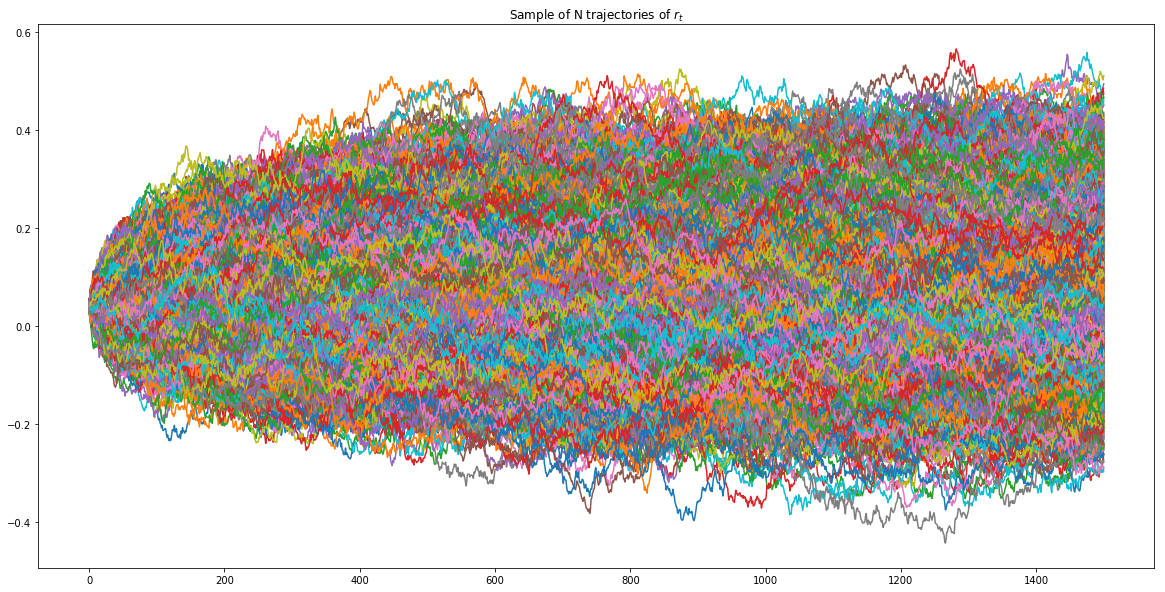

In [33]:
def r(x1,x2,theta1,theta2,lamb1,lamb2,sigma1,sigma2, n=n, m=N):
    X1=X(x1,theta1,lamb1,sigma1)
    X2=X(x2,theta2,lamb2,sigma2)
    return X1+X2

rt=r(x0,x0,theta,theta,lamb1,lamb2,sigma,sigma)
plt.figure(figsize=(20,10))
for j in range(N):
    plt.plot(rt[j])
plt.title("Sample of N trajectories of $r_t$")
plt.show()

In [109]:
def MC_P(x1,x2,theta1,theta2,lamb1,lamb2,sigma1,sigma2,n=n, m=N):
    dT=T/n
    rt=r(x1,x2,theta1,theta2,lamb1,lamb2,sigma1,sigma2,n,m)
    return np.mean(np.exp(-dT*np.cumsum(rt, axis=1)), axis=0)

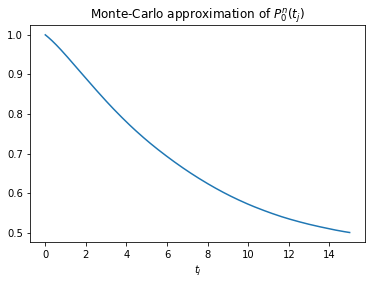

In [110]:
P=MC_P(x0,x0,theta,theta,lamb1,lamb2,sigma,sigma)
plt.plot(np.arange(0,n+1)*T/n,P)
plt.title("Monte-Carlo approximation of $P_0^n(t_j)$")
plt.xlabel("$t_j$")
plt.show()

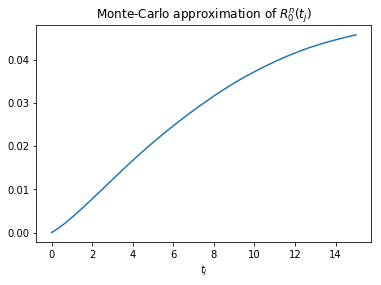

In [111]:
def Monte_Carlo_R(x1,x2,theta1,theta2,lamb1,lamb2,sigma1,sigma2,n=n, m=N):
    P=MC_P(x1,x2,theta1,theta2,lamb1,lamb2,sigma1,sigma2,n, m)
    return -np.log(P)/T

R_MC=Monte_Carlo_R(x0,x0,theta,theta,lamb1,lamb2,sigma,sigma)
plt.plot(np.arange(0,n+1)*T/n,R_MC)
plt.title("Monte-Carlo approximation of $R_0^n(t_j)$")
plt.xlabel("$t_j$")
plt.show()

We have $\rho_i(T) := \theta_i + (x_i - \theta_i) \frac{\Lambda_i(T)}{T} - \frac{\sigma_i^2}{2T} \int_0^T \Lambda_i(t)^2 dt $

with $\Lambda_i(t) := \frac{1-e^{-\lambda_i t}}{\lambda_i} $

Therefore :

$$\int_0^T \Lambda_i(t)^2 dt = \int_0^T (\frac{1-e^{-\lambda_i t}}{\lambda_i} )^2 dt  =  \int_0^T (\frac{1-2e^{-\lambda_i t}+e^{-2\lambda_i t}}{\lambda_i^2} ) dt  = \frac{1}{\lambda_i^2} \big[ t + \frac{2e^{-\lambda_i t}}{\lambda_i} -  \frac{e^{-2\lambda_i t}}{2\lambda_i} \big]_0^T  = \frac{1}{\lambda_i^2} \big( T+\frac{2e^{-\lambda_i T}}{\lambda_i} -  \frac{e^{-2\lambda_i T}}{2\lambda_i} - \frac{3}{2\lambda_i} \big)$$


In [131]:
def rho(t,x, theta, lamb, sigma):
    i=(t+2*np.exp(-lamb*t)/lamb - np.exp(-2*lamb*t)/(2*lamb) - 3/(2*lamb) )/(lamb**2)
    return theta+(x-theta)*(1-np.exp(-lamb*t))/(lamb*t)- i*sigma**2 /(2*t)

def R(x1,x2,theta1,theta2,lamb1,lamb2,sigma1,sigma2, n=n):
    times=np.arange(1,n+1)*T/n
    return rho(times, x1, theta1, lamb1, sigma1)+rho(times, x2, theta2, lamb2, sigma2)

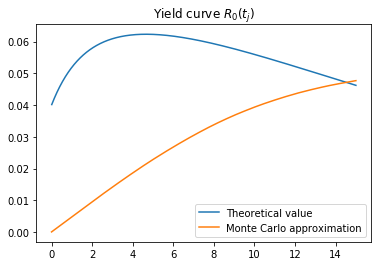

In [132]:
Rth=R(x0,x0,theta,theta,lamb1,lamb2,sigma,sigma)
plt.plot(np.arange(1,n+1)*T/n, Rth, label="Theoretical value")
plt.plot(np.arange(0,n+1)*T/n, R_MC, label="Monte Carlo approximation")
plt.legend()
plt.title("Yield curve $R_0(t_j)$")
plt.show()

### Question 2

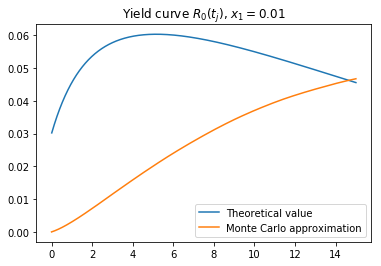

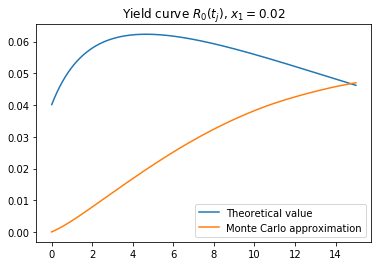

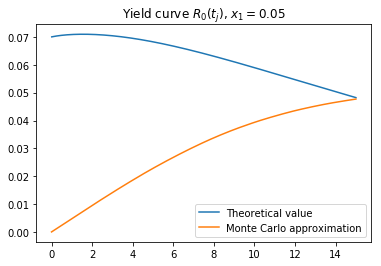

In [126]:
x2=0.02
for x1 in [0.01,0.02,0.05]:
    
    Rth=R(x1,x2,theta,theta,lamb1,lamb2,sigma,sigma)
    R_MC=Monte_Carlo_R(x1,x2,theta,theta,lamb1,lamb2,sigma,sigma)
    
    plt.figure()
    plt.plot(np.arange(1,n+1)*T/n, Rth, label="Theoretical value")
    plt.plot(np.arange(0,n+1)*T/n, R_MC, label="Monte Carlo approximation")
    plt.legend()
             
    plt.title("Yield curve $R_0(t_j)$, $x_1=$"+str(x1))
    plt.show()

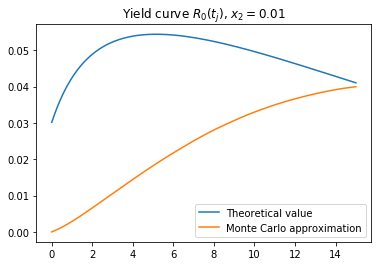

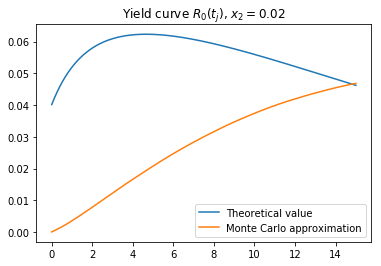

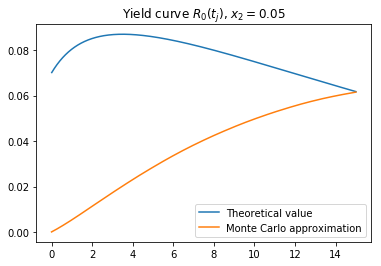

In [133]:
x1=0.02
for x2 in [0.01,0.02,0.05]:
    
    Rth=R(x1,x2,theta,theta,lamb1,lamb2,sigma,sigma)
    R_MC=Monte_Carlo_R(x1,x2,theta,theta,lamb1,lamb2,sigma,sigma)
    
    plt.figure()
    plt.plot(np.arange(1,n+1)*T/n, Rth, label="Theoretical value")
    plt.plot(np.arange(0,n+1)*T/n, R_MC, label="Monte Carlo approximation")
    plt.legend()
             
    plt.title("Yield curve $R_0(t_j)$, $x_2=$"+str(x2))
    plt.show()

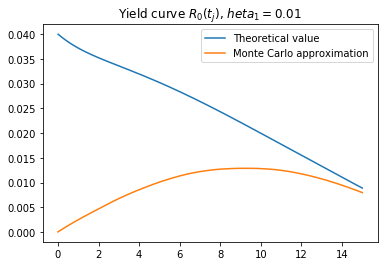

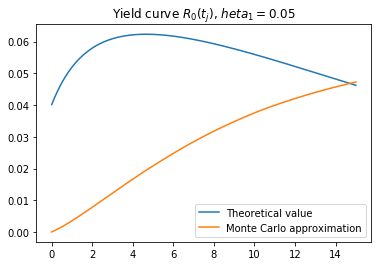

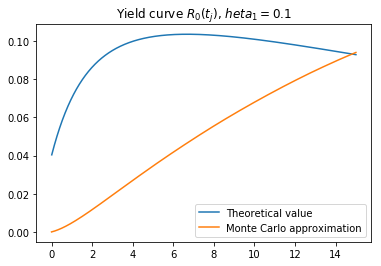

In [140]:
theta2=0.05
for theta1 in [0.01,0.05,0.1]:
    
    Rth=R(x0,x0,theta1,theta2,lamb1,lamb2,sigma,sigma)
    R_MC=Monte_Carlo_R(x0,x0,theta1,theta2,lamb1,lamb2,sigma,sigma)
    
    plt.figure()
    plt.plot(np.arange(1,n+1)*T/n, Rth, label="Theoretical value")
    plt.plot(np.arange(0,n+1)*T/n, R_MC, label="Monte Carlo approximation")
    plt.legend()
             
    plt.title("Yield curve $R_0(t_j)$, $\theta_1=$"+str(theta1))
    plt.show()

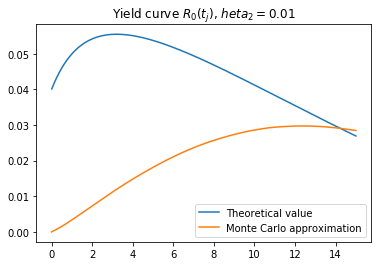

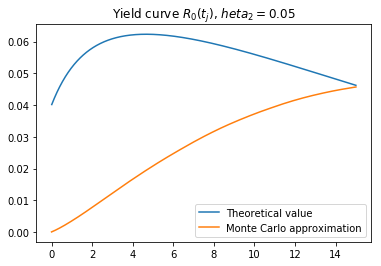

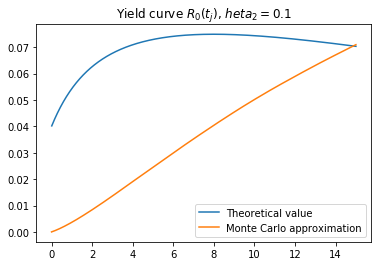

In [137]:
theta1=0.05
for theta2 in [0.01,0.05,0.1]:
    
    Rth=R(x0,x0,theta1,theta2,lamb1,lamb2,sigma,sigma)
    R_MC=Monte_Carlo_R(x0,x0,theta1,theta2,lamb1,lamb2,sigma,sigma)
    
    plt.figure()
    plt.plot(np.arange(1,n+1)*T/n, Rth, label="Theoretical value")
    plt.plot(np.arange(0,n+1)*T/n, R_MC, label="Monte Carlo approximation")
    plt.legend()
             
    plt.title("Yield curve $R_0(t_j)$, $\theta_2=$"+str(theta2))
    plt.show()

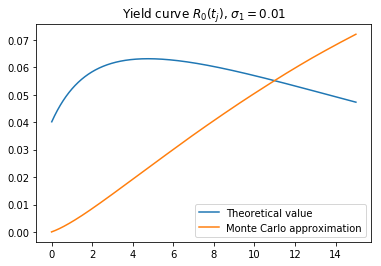

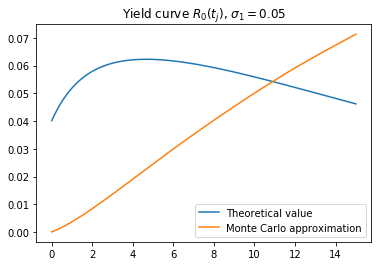

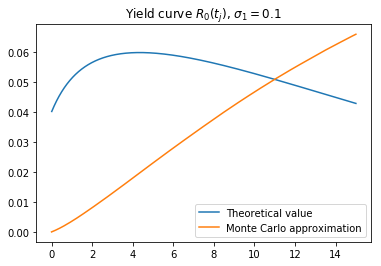

In [138]:
sigma2=0.05
for sigma1 in [0.01,0.05,0.1]:
    
    Rth=R(x0,x0,theta,theta,lamb1,lamb2,sigma1,sigma2)
    R_MC=Monte_Carlo_R(x0,x0,theta1,theta2,lamb1,lamb2,sigma1,sigma2)
    
    plt.figure()
    plt.plot(np.arange(1,n+1)*T/n, Rth, label="Theoretical value")
    plt.plot(np.arange(0,n+1)*T/n, R_MC, label="Monte Carlo approximation")
    plt.legend()
             
    plt.title("Yield curve $R_0(t_j)$, $\sigma_1=$"+str(sigma1))
    plt.show()

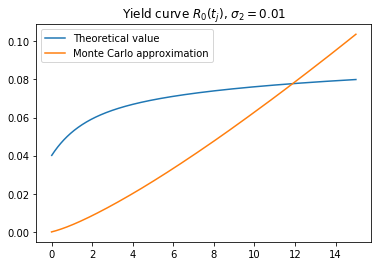

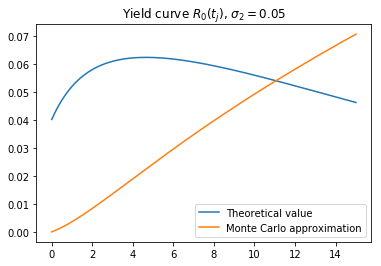

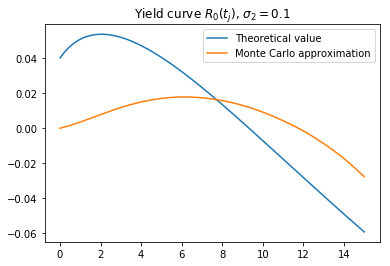

In [139]:
sigma1=0.05
for sigma2 in [0.01,0.05,0.1]:
    
    Rth=R(x0,x0,theta,theta,lamb1,lamb2,sigma1,sigma2)
    R_MC=Monte_Carlo_R(x0,x0,theta1,theta2,lamb1,lamb2,sigma1,sigma2)
    
    plt.figure()
    plt.plot(np.arange(1,n+1)*T/n, Rth, label="Theoretical value")
    plt.plot(np.arange(0,n+1)*T/n, R_MC, label="Monte Carlo approximation")
    plt.legend()
             
    plt.title("Yield curve $R_0(t_j)$, $\sigma_2=$"+str(sigma2))
    plt.show()

Overall, the approximation looks good for large values of $\theta$ and $\sigma$.